In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X


array([[ -8.1039462 ,  -7.46985841],
       [-12.23834668,  -6.63749543],
       [  8.41444626,   7.13893929],
       ...,
       [ -9.81045413,  -6.25760399],
       [ -0.80540354,   1.31716998],
       [ -2.32805989,  -0.8521324 ]])

In [4]:
y

array([2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2,
       1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1,
       2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1,
       1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0,
       2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1,
       0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0,
       2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2,

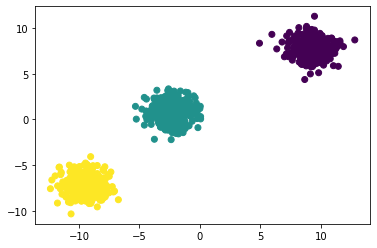

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default

In [12]:
wcss

[1339.9999999999993,
 299.7400533773912,
 27.201612962827713,
 23.33512024386697,
 19.617063658256832,
 16.450230571042283,
 14.722336922232651,
 13.254195337234338,
 11.553674304317088,
 10.424079070960891]

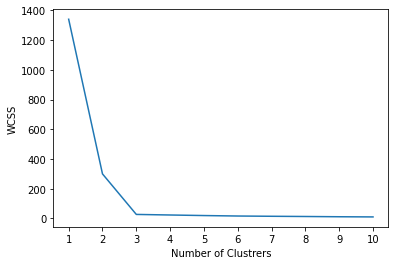

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 2,
       1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2,
       1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2,
       1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2,
       2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2,
       1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 1,
       2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 0,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1,
       1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1,
       0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 1,
       0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2,
       1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0,
       0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1,

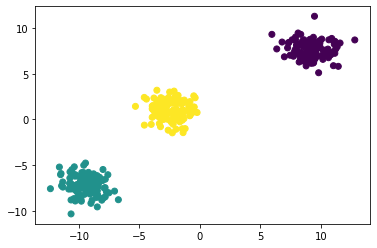

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [19]:
## kneelocator
!pip install kneed

    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from kneed import KneeLocator

In [21]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [22]:
kl.elbow

3

In [23]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [24]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python 3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default

In [25]:
silhouette_coefficients

[0.7151929503956483,
 0.846270190185481,
 0.6861473871727976,
 0.5162532432938728,
 0.35258468322295217,
 0.35765862182457925,
 0.352805017803791,
 0.3403153481870257,
 0.35459647573990427]